In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from tqdm import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, ShuffleSplit

# Setup

In [3]:
# Función óptima
def f(x):
    return np.exp(x)

In [4]:
# Tamaño de la muestra
N = 100

# Error irreducible
sigma_epsilon = 1

# Máximo de x
x_max = 2

# Punto para test
x_test = 1

# Vector de valores de x
x = x_max * (2 * np.random.rand(N) - 1)

# Ruido
epsilon = sigma_epsilon * np.random.randn(N)

# Función verdadera + ruido
y = f(x) + epsilon

# Punto 1 

En la sección de la Notebook “Predicciones para un x fijo” se utiliza un x_test elegido aleatoriamente en el intervalo [−x_max, x_max]. 

Fijar distintos valores de x_test, analizar la distribución de las predicciones en esos valores y relacionarlo con el modelo que se está entrenando
así como la forma del gráfico en ese punto.

In [5]:
# Punto para test
np.random.seed(42)

x_tests = x_max * (2 * np.random.rand(5) - 1)

In [6]:
x_tests

array([-0.50183952,  1.80285723,  0.92797577,  0.39463394, -1.37592544])

In [7]:
# R datasets
R = 10000

# max_depth de los árboles
depth_list = [1, None]

# Registramos las R predicciones en x_test
y_hat_test = np.zeros((len(depth_list), R))

resultados = dict()

# Iterar sobre x_tests
for x_test in x_tests:

    # Iteramos en los R datasets
    for r in tqdm(range(R)):
        # Tomamos una muestra de tamaño N
        x = x_max * (2 * np.random.rand(N) - 1) # Vector de valores de x
        epsilon = sigma_epsilon * np.random.randn(N) # Ruido

        y = f(x) + epsilon # Función verdadera + ruido

        # Calculamos la predicción para cada profundidad
        for k in range(len(depth_list)):
            # Construimos el árbol
            d = depth_list[k]
            tree = DecisionTreeRegressor(max_depth=d)

            # Entrenamos el árbol
            tree.fit(x.reshape(-1, 1), y)

            # Calculamos la predicción
            y_hat_test[k, r] = tree.predict(np.array([[x_test]])).item()
            
            resultados[x_test] = {"x_test": x_test,
                            "y_hat_test": y_hat_test.copy()  # .copy() para evitar referencias
                        }

100%|██████████| 10000/10000 [00:04<00:00, 2084.97it/s]


In [12]:
resultados

{np.float64(-0.50183952461055): {'x_test': np.float64(-0.50183952461055),
  'y_hat_test': array([[ 0.72412377,  0.93341368,  1.18033152, ...,  0.73017259,
           0.87637927,  0.76086503],
         [-2.06924469,  1.15504401,  0.80635117, ...,  1.52058803,
           0.57638543,  0.22693735]])},
 np.float64(1.8028572256396647): {'x_test': np.float64(1.8028572256396647),
  'y_hat_test': array([[5.52159291, 3.3544796 , 4.60972561, ..., 4.73895555, 4.66172282,
          3.81164755],
         [6.70824632, 6.57041842, 4.8073111 , ..., 4.8879612 , 5.95467243,
          7.09171608]])},
 np.float64(0.9279757672456204): {'x_test': np.float64(0.9279757672456204),
  'y_hat_test': array([[1.12950974, 4.7323426 , 1.02413768, ..., 0.81610817, 0.86943311,
          4.36839878],
         [1.73165747, 4.74470599, 2.22229672, ..., 2.60777686, 1.13011749,
          3.57932442]])},
 np.float64(0.3946339367881464): {'x_test': np.float64(0.3946339367881464),
  'y_hat_test': array([[1.1044437 , 1.14003605,

In [13]:
for key, value in resultados.items():
    print(f"Clave: {key}")
    for subkey, subvalue in value.items():
        # Si el valor es un array de numpy, mostramos su shape
        if hasattr(subvalue, 'shape'):
            print(f"  {subkey}: shape = {subvalue.shape}")
        else:
            print(f"  {subkey}: type = {type(subvalue)}")

Clave: -0.50183952461055
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)
Clave: 1.8028572256396647
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)
Clave: 0.9279757672456204
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)
Clave: 0.3946339367881464
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)
Clave: -1.375925438230254
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)


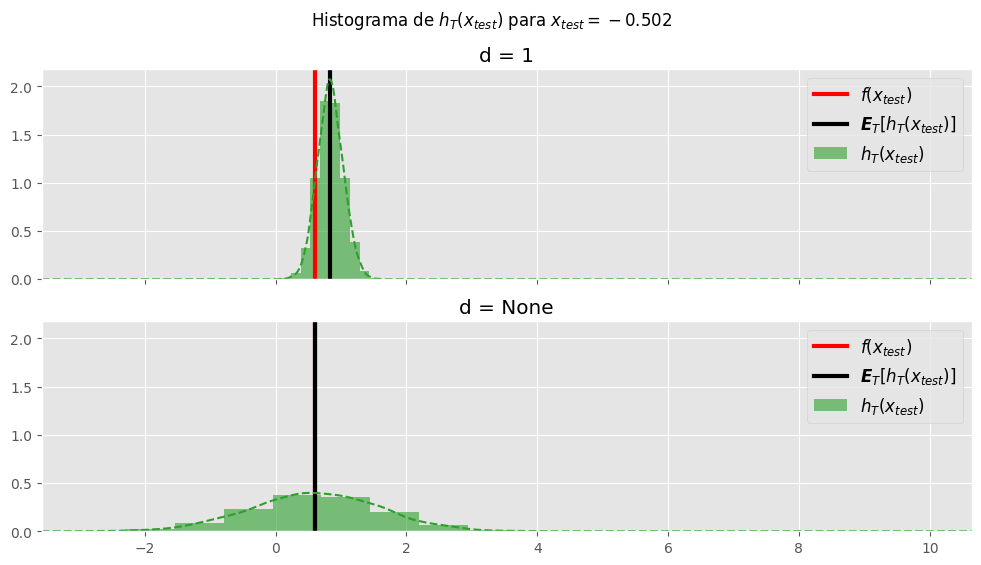

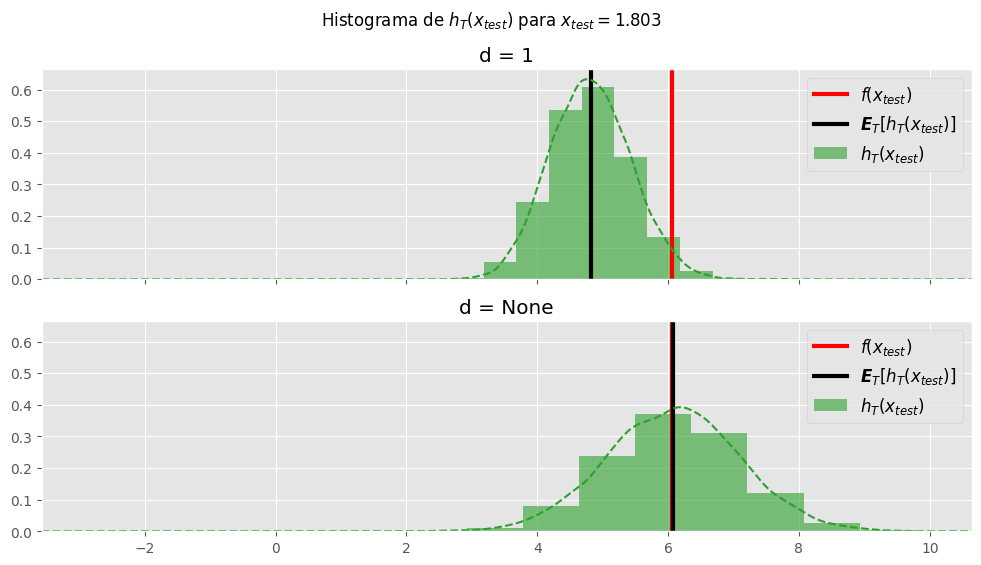

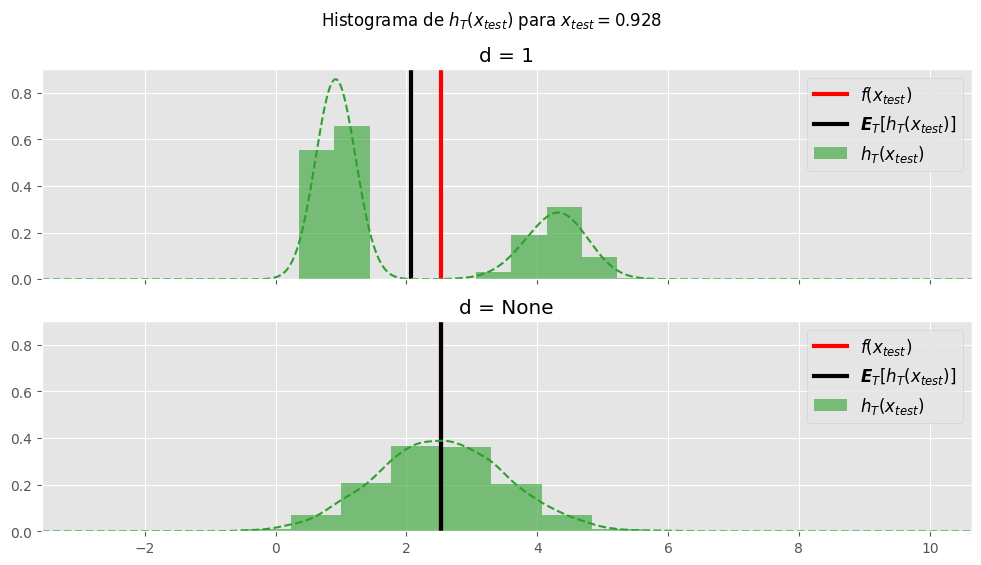

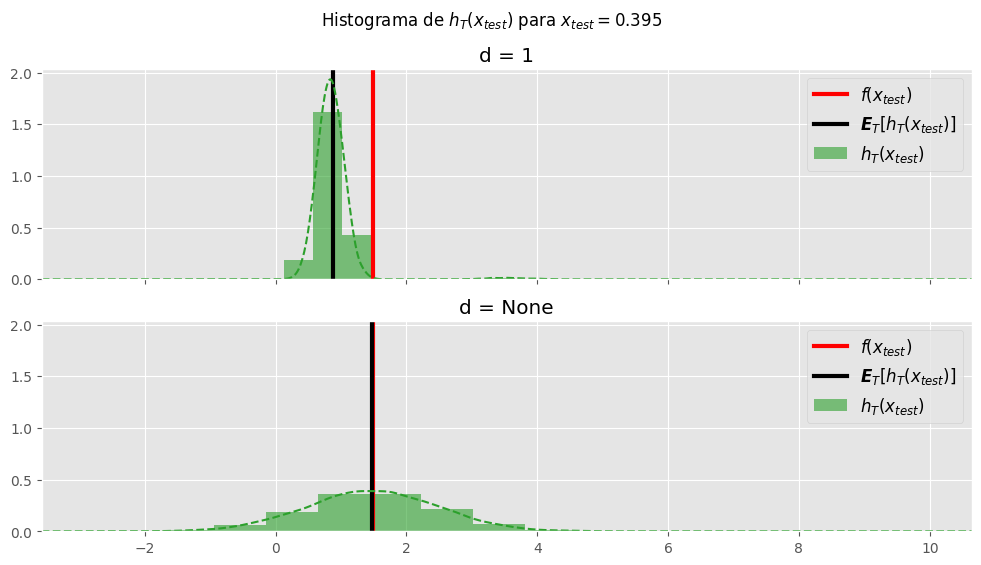

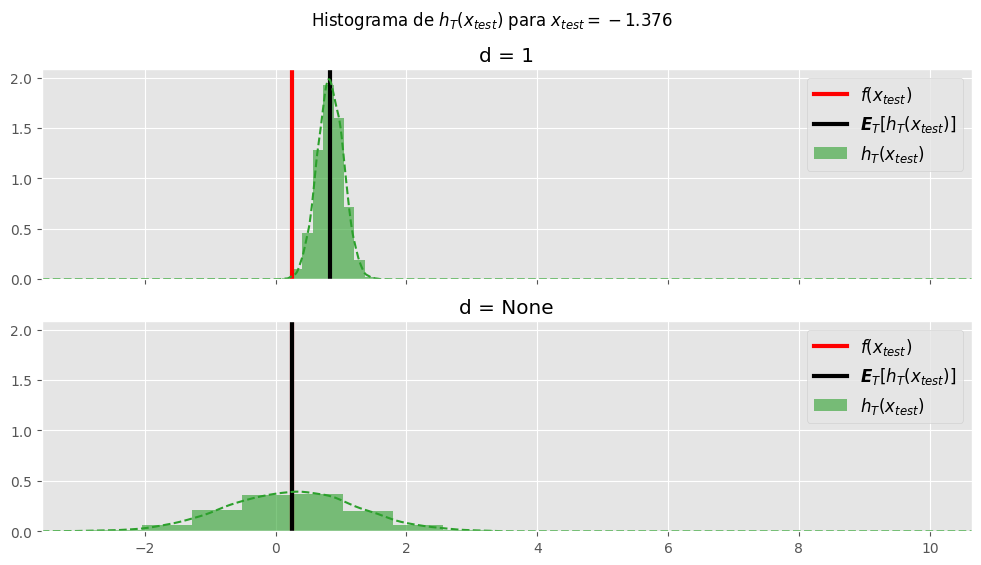

In [37]:
# 1. Calcular los límites globales del eje x
y_min = float('inf')
y_max = float('-inf')

predicciones = pd.DataFrame()

for value in resultados.values():
    y_hat_test = value["y_hat_test"]
    y_min = min(y_min, y_hat_test.min())
    y_max = max(y_max, y_hat_test.max())

# 2. Graficar usando los mismos límites de eje x
for key, value in resultados.items():
    x_test = value["x_test"]
    y_hat_test = value["y_hat_test"]

    y_hat_test_mean = np.mean(y_hat_test, 1)

    
    fig, axs = plt.subplots(len(depth_list), 1, sharex=True, sharey=True, figsize=(12,6))

    for k in range(len(depth_list)):
        axs[k].hist(y_hat_test[k], density=True, color='tab:green', alpha=0.6)
        axs[k].set_xlim(y_min, y_max)  # Fijar los mismos límites en todos los plots
        axs[k].axvline(x=f(x_test), color='r', linewidth=3.0)
        axs[k].axvline(x=y_hat_test_mean[k], color='k', linewidth=3.0)
        axs[k].title.set_text('d = {}'.format(depth_list[k]))
        axs[k].legend([r'$f(x_{test})$', r'$\boldsymbol{E}_T[h_T(x_{test})]$', r'$h_T(x_{test})$'], fontsize=12)
        
        datos = pd.DataFrame()
        
        datos['x_test'] = x_test
        datos['y_hat_test'] = y_hat_test[k]
        datos['y_hat_test_mean'] = y_hat_test_mean[k]
        datos['f_test'] = f(x_test)
        
        predicciones = pd.concat([predicciones, datos])

    for k in range(len(depth_list)):
        x_range = np.linspace(y_min, y_max, 1000)
        kde = stats.gaussian_kde(y_hat_test[k])
        axs[k].plot(x_range, kde(x_range), color='tab:green', ls='--')

    plt.suptitle(rf'Histograma de $h_T(x_{{test}})$ para $x_{{test}}={x_test:.3f}$', size=12)
    plt.show()

Para valores de x_test cercanos a -x_max, tenemos reducción en varianza y de sesgo, mientras que valores de x_test cercanos a x_max tenemos mayor varianza con aumento de sesgo. 